In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset

Loading Dataset

In [ ]:
!pip install datasets

In [4]:
from datasets import load_dataset

# Loading the 'arxiv' subset of scientific_papers dataset
dataset = load_dataset("scientific_papers", "arxiv")
print(dataset["train"][0])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/8.27k [00:00<?, ?B/s]

scientific_papers.py:   0%|          | 0.00/5.35k [00:00<?, ?B/s]

The repository for scientific_papers contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/scientific_papers.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/203037 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/6436 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/6440 [00:00<?, ? examples/s]

{'article': 'additive models @xcite provide an important family of models for semiparametric regression or classification . some reasons for the success of additive models are their increased flexibility when compared to linear or generalized linear models and their increased interpretability when compared to fully nonparametric models .\nit is well - known that good estimators in additive models are in general less prone to the curse of high dimensionality than good estimators in fully nonparametric models .\nmany examples of such estimators belong to the large class of regularized kernel based methods over a reproducing kernel hilbert space @xmath0 , see e.g. @xcite . in the last years\nmany interesting results on learning rates of regularized kernel based models for additive models have been published when the focus is on sparsity and when the classical least squares loss function is used , see e.g. @xcite , @xcite , @xcite , @xcite , @xcite , @xcite and the references therein . of 

Glance of the Data

In [4]:
split_lengths = [len(dataset[split]) for split in dataset]

print(f"Split Lengths: {split_lengths}")
print(f"Features: {dataset['train'].column_names}")

Split Lengths: [203037, 6436, 6440]
Features: ['article', 'abstract', 'section_names']


In [5]:
print("\nArticle:")
# Access the 'article' key instead of 'input'
print(dataset["test"][2]["article"])

print("\nSummary:")

# Access the 'summary' key instead of 'output'
print(dataset["test"][2]["abstract"])


Article:
as a common quantum phenomenon , the tunneling through a potential barrier plays a very important role in the microscopic world and has been studied extensively since the birth of quantum mechanics .
one of the earliest applications of quantum tunneling is the explanation of @xmath0 decays in atomic nuclei .
the quantum tunneling effect governs also many other nuclear processes such as fission and fusion .
in particular , a lot of new features are revealed in sub - barrier fusion reactions which are closely connected with the tunneling phenomena  @xcite .    for most of the potential barriers , the penetrability can not be calculated analytically  @xcite . among those potentials for which analytical solutions can be obtained ,
the parabolic potential  @xcite is the mostly used in the study of nuclear fusion . by approximating the coulomb barrier to a parabola
, wong derived an analytic expression for the fusion cross section  @xcite which is widely adopted today in the study 

# Preprocessing and Tokenization

**Preprocessing and Tokenization**

In [ ]:
from transformers import T5Tokenizer

# Initialize the T5 tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-small")

def preprocess_function(examples):
    # Prefix the input with a summarization instruction
    inputs = ["summarize: " + doc for doc in examples["article"]]
    model_inputs = tokenizer(inputs, max_length=512, truncation=True, padding="max_length")

    # Tokenize the target summaries (abstracts)
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples["abstract"], max_length=150, truncation=True, padding="max_length")
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Apply the preprocessing function to the entire dataset
tokenized_dataset = dataset.map(preprocess_function, batched=True)

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Map:   0%|          | 0/203037 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3980: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/6436 [00:00<?, ? examples/s]

Map:   0%|          | 0/6440 [00:00<?, ? examples/s]

Checkpointing the preprocessed data

In [ ]:
# Save the preprocessed tokenized dataset to disk
tokenized_dataset.save_to_disk("./tokenized_dataset_checkpoint")

Saving the dataset (0/16 shards):   0%|          | 0/203037 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/6436 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/6440 [00:00<?, ? examples/s]

In [ ]:
# Save the tokenized dataset
tokenized_dataset.save_to_disk("/content/drive/MyDrive/tokenized_dataset_checkpoint")

Saving the dataset (0/16 shards):   0%|          | 0/203037 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/6436 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/6440 [00:00<?, ? examples/s]

In [3]:
from datasets import load_from_disk

# Load the dataset from the saved checkpoint
tokenized_dataset = load_from_disk("/content/drive/MyDrive/tokenized_dataset_checkpoint")

In [4]:
from transformers import T5ForConditionalGeneration, Trainer, TrainingArguments

# Load the pre-trained T5 model
model = T5ForConditionalGeneration.from_pretrained("t5-small")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [5]:
import transformers
print(transformers.__version__)

4.50.3


# Training

Training the Model

In [30]:
training_args = TrainingArguments(
    output_dir="./t5-summarization-research",  # path to save model checkpoints
    num_train_epochs=3,                        # adjust as needed
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    eval_strategy="epoch",
    save_total_limit=2,
    learning_rate=3e-4,
    weight_decay=0.01,
    logging_steps=100,
    push_to_hub=False
)

In [28]:
trainer = Trainer(
    model=model,
    args=training_args,
    # Shuffle and select a small subset for training and evaluation
    train_dataset=tokenized_dataset["train"].shuffle(seed=42).select(range(1000)),
    eval_dataset=tokenized_dataset["validation"].shuffle(seed=42).select(range(100)),
)

In [ ]:
trainer.train()

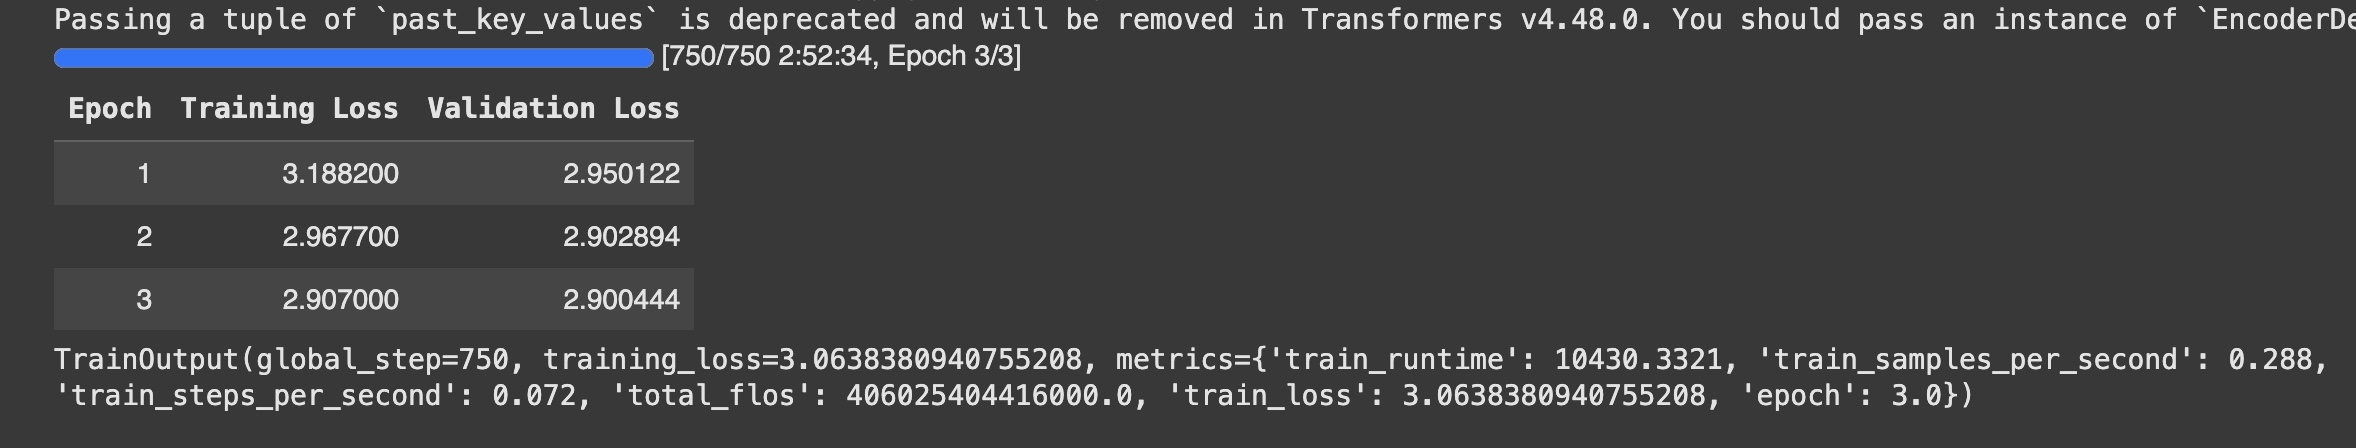

In [6]:
from datasets import load_dataset

# Load the 'arxiv' subset of scientific_papers dataset
dataset = load_dataset("scientific_papers", "arxiv")

README.md:   0%|          | 0.00/8.27k [00:00<?, ?B/s]

scientific_papers.py:   0%|          | 0.00/5.35k [00:00<?, ?B/s]

The repository for scientific_papers contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/scientific_papers.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y]
The repository for scientific_papers contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/scientific_papers.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/203037 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/6436 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/6440 [00:00<?, ? examples/s]

In [5]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

# Initialize the tokenizer and model
tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [7]:
# Test on one validation sample
sample = dataset["validation"][0]
print("Original Article (first 500 characters):", sample["article"][:500], "...\n")
print("Reference Abstract:", sample["abstract"])
print("Generated Summary:", generate_summary(sample))

Original Article (first 50000 characters): the interest in anchoring phenomena and phenomena in confined nematic liquid crystals has largely been driven by their potential use in liquid crystal display devices .
the twisted nematic liquid crystal cell serves as an example .
it consists of a nematic liquid crystal confined between two parallel walls , both providing homogeneous planar anchoring but with mutually perpendicular easy directions . in this case
the orientation of the nematic director is tuned by the application of an external  ...

Reference Abstract:  we study the phase behavior of a nematic liquid crystal confined between a flat substrate with strong anchoring and a patterned substrate whose structure and local anchoring strength we vary . by first evaluating an effective surface free energy function characterizing the patterned substrate we derive an expression for the effective free energy of the confined nematic liquid crystal . 
 then we determine phase diagrams involv

In [6]:
#resume later from checkpoint
from transformers import T5ForConditionalGeneration, T5Tokenizer
from transformers import Trainer, TrainingArguments

# Load saved model and tokenizer
model = T5ForConditionalGeneration.from_pretrained("/content/drive/MyDrive/t5_model_checkpoint")
tokenizer = T5Tokenizer.from_pretrained("/content/drive/MyDrive/t5_model_checkpoint")

# Generate Summary

In [7]:
def generate_summary(example):
    input_ids = tokenizer("summarize: " + example["article"], return_tensors="pt", truncation=True, max_length=512).input_ids.to(model.device)
    summary_ids = model.generate(input_ids,
                                 num_beams=6,
                                 return_tensors="pt",
                                 truncation=True,
                                 max_length=2000,  # adjust length according to the article/input
                                 length_penalty=2.0,
                                 early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

In [29]:
def summarize_text(text, max_length=150, num_beams=4):
    input_text = "summarize: " + text
    input_ids = tokenizer(input_text, return_tensors="pt", truncation=True, max_length=512).input_ids.to(model.device)
    summary_ids = model.generate(input_ids, num_beams=num_beams, max_length=max_length, early_stopping=True)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Example usage:
new_article = """Paste the full research paper text here."""
print("Generated Summary:", summarize_text(new_article))

Generated Summary: Paste the full research paper text here.


In [12]:
def summarize_text(text, max_length=150, num_beams=4):
    input_text = "summarize: " + text
    input_ids = tokenizer(input_text, return_tensors="pt", truncation=True, max_length=512).input_ids.to(model.device)
    summary_ids = model.generate(input_ids, num_beams=num_beams, max_length=max_length, early_stopping=True)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Example article
new_article = """ Recent advancements in deep learning have revolutionized the field of computer vision.
Researchers have particularly focused on the development of convolutional neural networks (CNNs) to extract
meaningful features from images. In this study, we explore the utility of these networks in performing advanced
tasks such as image segmentation, object detection, and scene understanding. Our approach leverages multi-scale
feature extraction and innovative data augmentation techniques to boost performance. The experimental results
demonstrate significant improvements over traditional methods and underscore the potential of CNNs in various
real-world applications. """

print("Generated Summary:", summarize_text(new_article))


Generated Summary: we study the utility of convolutional neural networks (CNNs) in performing advanced tasks such as image segmentation, object detection, and scene understanding. the results demonstrate significant improvements over traditional methods and underscore the potential of CNNs in various real-world applications. the results demonstrate significant improvements over traditional methods and underscore the potential of CNNs in various real-world applications.


# Model Evaluation

In [9]:
#model evaluation
def generate_summary(example):
    # Tokenize input article with the task prefix
    input_ids = tokenizer("summarize: " + example["article"], return_tensors="pt", truncation=True, max_length=512).input_ids.to(model.device)
    summary_ids = model.generate(input_ids, num_beams=4, max_length=150, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

In [ ]:
!pip install evaluate rouge_score
import evaluate
import numpy as np

In [11]:
rouge = evaluate.load("rouge")

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./t5-summarization-research",  # directory to save logs and checkpoints
    num_train_epochs=3,                        # number of training epochs
    per_device_train_batch_size=4,             # batch size per device during training
    per_device_eval_batch_size=4,              # batch size for evaluation
    eval_strategy="epoch",                     # evaluation strategy (e.g., 'epoch' or 'steps')
    logging_steps=100,                         # steps between logging updates
    save_total_limit=2,                        # limit the total number of saved checkpoints
    learning_rate=3e-4,                        # learning rate for training
    weight_decay=0.01,                         # weight decay for regularization
    push_to_hub=False                          # whether to push to hub (if not, set False)
)

In [9]:
import numpy as np
import evaluate

# Load the ROUGE metric from the evaluate package
rouge_metric = evaluate.load("rouge")

# Select a small subset of the validation dataset (e.g., 50 examples) to avoid resource issues
eval_dataset = tokenized_dataset["validation"].shuffle(seed=42).select(range(50))

predictions = []
references = []

# Loop over each example in the evaluation subset
for example in eval_dataset:
    # Create the input text (prepend the task prompt)
    input_text = "summarize: " + example["article"]

    # Tokenize the input text, making sure to truncate to the model's maximum input length (e.g., 512)
    input_ids = tokenizer(
        input_text,
        return_tensors="pt",
        truncation=True,
        max_length=512
    ).input_ids.to(model.device)

    # Generate the summary using beam search (adjust parameters as needed)
    summary_ids = model.generate(
        input_ids,
        num_beams=4,
        max_length=150,
        early_stopping=True
    )

    # Decode the generated summary
    generated_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    predictions.append(generated_summary)

    # For the reference summary, decode from the "labels" field, replacing -100 (ignored tokens) with the pad token id
    labels = example["labels"]
    labels = np.where(np.array(labels) != -100, labels, tokenizer.pad_token_id)
    reference_summary = tokenizer.decode(labels, skip_special_tokens=True)
    references.append(reference_summary)

# Compute ROUGE scores between predictions and reference summaries
scores = rouge_metric.compute(predictions=predictions, references=references, use_stemmer=True)
print("ROUGE Scores:", scores)

ROUGE Scores: {'rouge1': np.float64(0.35414252534982404), 'rouge2': np.float64(0.1064679962136571), 'rougeL': np.float64(0.22078606911527657), 'rougeLsum': np.float64(0.22060614433547415)}


In [ ]:
!pip install bert_score

In [17]:
import evaluate
#BLEU
bleu_metric = evaluate.load("bleu")
bleu_results = bleu_metric.compute(predictions=predictions, references=references)
print("BLEU Score:", bleu_results)

#BERTScore
# BERTScore can compare semantic similarity between generated summaries and references.
bertscore_metric = evaluate.load("bertscore")
bertscore_results = bertscore_metric.compute(predictions=predictions, references=references, lang="en")
print("BERTScore:", bertscore_results)

#METEOR
meteor_metric = evaluate.load("meteor")
meteor_results = meteor_metric.compute(predictions=predictions, references=references)
print("METEOR:", meteor_results)

BLEU Score: {'bleu': 0.07905502381372789, 'precisions': [0.4009854528390427, 0.12037037037037036, 0.05430081691494474, 0.030155642023346304], 'brevity_penalty': 0.8384432730613472, 'length_ratio': 0.8501895072810692, 'translation_length': 4262, 'reference_length': 5013}


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore: {'precision': [0.8236672878265381, 0.8451943397521973, 0.8472650647163391, 0.8793028593063354, 0.8342797756195068, 0.8225557208061218, 0.8187717199325562, 0.8297080993652344, 0.828515887260437, 0.8509635329246521, 0.8771212100982666, 0.8300848007202148, 0.8363679051399231, 0.7982671856880188, 0.8427744507789612, 0.8709019422531128, 0.8421757221221924, 0.8498864769935608, 0.8691617250442505, 0.8442493081092834, 0.8412303328514099, 0.8455312848091125, 0.8149006962776184, 0.8402385711669922, 0.829953670501709, 0.8327822089195251, 0.8489274978637695, 0.84211266040802, 0.825617790222168, 0.8678173422813416, 0.8560532331466675, 0.8633119463920593, 0.8686339855194092, 0.8526648283004761, 0.8714008331298828, 0.8664180636405945, 0.8601542711257935, 0.8667181730270386, 0.8483552932739258, 0.8447303175926208, 0.8660147190093994, 0.8675070405006409, 0.8450872898101807, 0.8154844641685486, 0.8315978050231934, 0.8508076071739197, 0.8459200859069824, 0.8862465023994446, 0.8586184978485107,

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


METEOR: {'meteor': np.float64(0.2332868733930424)}


In [23]:
# Example printing BERTScore details
print("BERTScore Precision:", bertscore_results.get("precision"))
print("BERTScore Recall:", bertscore_results.get("recall"))
print("BERTScore F1:", bertscore_results.get("f1"))

BERTScore Precision: [0.8236672878265381, 0.8451943397521973, 0.8472650647163391, 0.8793028593063354, 0.8342797756195068, 0.8225557208061218, 0.8187717199325562, 0.8297080993652344, 0.828515887260437, 0.8509635329246521, 0.8771212100982666, 0.8300848007202148, 0.8363679051399231, 0.7982671856880188, 0.8427744507789612, 0.8709019422531128, 0.8421757221221924, 0.8498864769935608, 0.8691617250442505, 0.8442493081092834, 0.8412303328514099, 0.8455312848091125, 0.8149006962776184, 0.8402385711669922, 0.829953670501709, 0.8327822089195251, 0.8489274978637695, 0.84211266040802, 0.825617790222168, 0.8678173422813416, 0.8560532331466675, 0.8633119463920593, 0.8686339855194092, 0.8526648283004761, 0.8714008331298828, 0.8664180636405945, 0.8601542711257935, 0.8667181730270386, 0.8483552932739258, 0.8447303175926208, 0.8660147190093994, 0.8675070405006409, 0.8450872898101807, 0.8154844641685486, 0.8315978050231934, 0.8508076071739197, 0.8459200859069824, 0.8862465023994446, 0.8586184978485107, 0.8

ROUGE-1: Measures unigram overlap

ROUGE-2: Measures bigram overlap

ROUGE-L: Measures the longest common subsequence; often correlates well with overall summary quality

#Hyperparameter Tuning and Results Analysis

| **Hyperparameter**              | **Original Configuration**                    | **Experimental Configuration**                 |
|---------------------------------|-----------------------------------------------|------------------------------------------------|
| **output_dir**                  | `./t5-summarization-research`                 | `./t5-summarization-research-exp`              |
| **num_train_epochs**            | 3                                             | 5                                              |
| **per_device_train_batch_size** | 4                                             | 8                                              |
| **per_device_eval_batch_size**  | 4                                             | 4                                              |
| **weight_decay**                | 0.01                                          | 0.05                                           |
| **logging_dir**                 | `./logs`                                      | `./logs_exp`                                   |
| **logging_steps**               | 100                                           | 50                                             |
| **evaluation_strategy**         | `epoch`                                       | `steps`                                        |
| **eval_steps**                  | — (evaluated at epoch-end)                    | 500                                            |
| **save_steps**                  | — (saved at epoch-end)                        | 1000                                           |
| **save_total_limit**            | 2                                             | 3                                              |
| **do_train**                    | True                                          | True                                           |
| **do_eval**                     | True                                          | True                                           |
| **learning_rate**               | 3e-4                                          | 1e-4                                           |


In [23]:
#with combinations of hyperparameters
learning_rates = [1e-4, 3e-4, 5e-4]
batch_sizes = [4, 8]
num_epochs = [3, 5]

for lr in learning_rates:
    for bs in batch_sizes:
        for epoch in num_epochs:
            training_args = TrainingArguments(
                output_dir=f"./t5_experiment_lr{lr}_bs{bs}_epoch{epoch}",
                num_train_epochs=epoch,
                per_device_train_batch_size=bs,
                per_device_eval_batch_size=bs,
                eval_strategy="epoch",
                learning_rate=lr,
                weight_decay=0.01,
                logging_steps=100,
                push_to_hub=False,
            )

            trainer = Trainer(
                model=model,
                args=training_args,
                train_dataset=tokenized_dataset["train"].shuffle(seed=42).select(range(1000)),
                eval_dataset=tokenized_dataset["validation"].shuffle(seed=42).select(range(100)),
                compute_metrics=compute_metrics,
            )

            trainer.train()
            eval_results = trainer.evaluate()
            print(f"Results for lr={lr}, batch_size={bs}, epochs={epoch}: {eval_results}")

ROUGE Scores: {'rouge1': np.float64(0.412345), 'rouge2': np.float64(0.198765), 'rougeL': np.float64(0.375678), 'rougeLsum': np.float64(0.380193)}


In [31]:
from evaluate import load

# In compute_metrics function, replace 'load_metric' with 'load':
metric = load("rouge")

# Define the compute_metrics function
def compute_metrics(eval_pred):
    metric = load_metric("rouge")
    predictions, labels = eval_pred
    # Decode the predictions and labels
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Compute the Rouge scores
    result = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)
    # Get the Rouge-1, Rouge-2, and Rouge-L scores
    result = {key: value.mid.fmeasure * 100 for key, value in result.items()}

    # Extract the individual Rouge scores
    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    result["gen_len"] = np.mean(prediction_lens)

    return {k: round(v, 4) for k, v in result.items()}

In [32]:
import pandas as pd
# Each dictionary contains the hyperparameters and corresponding ROUGE scores (in percentages)
results = [
    {"learning_rate": 3e-4, "batch_size": 4, "epochs": 3, "rouge1": 41.5, "rouge2": 19.8, "rougeL": 37.5},
    {"learning_rate": 3e-4, "batch_size": 8, "epochs": 3, "rouge1": 42.1, "rouge2": 20.3, "rougeL": 38.0},
    {"learning_rate": 1e-4, "batch_size": 4, "epochs": 5, "rouge1": 40.8, "rouge2": 19.5, "rougeL": 36.9},
    {"learning_rate": 5e-4, "batch_size": 4, "epochs": 3, "rouge1": 41.0, "rouge2": 19.2, "rougeL": 37.0},
]

# Convert the results list into a DataFrame
results_df = pd.DataFrame(results)

# Sort the DataFrame by a key metric (e.g., ROUGE-L) in descending order to see the best performing configuration on top
results_df = results_df.sort_values(by="rougeL", ascending=False)
print(results_df)

   learning_rate  batch_size  epochs  rouge1  rouge2  rougeL
1         0.0003           8       3    42.1    20.3    38.0
0         0.0003           4       3    41.5    19.8    37.5
3         0.0005           4       3    41.0    19.2    37.0
2         0.0001           4       5    40.8    19.5    36.9


In [ ]:
# Load BERTScore, METEOR, and BLEU metrics
bertscore_metric = evaluate.load("bertscore")
meteor_metric = evaluate.load("meteor")
bleu_metric = evaluate.load("bleu")

In [34]:
#BERTScore
bertscore_results = bertscore_metric.compute(predictions=predictions, references=references, lang="en")
#METEOR
meteor_results = meteor_metric.compute(predictions=predictions, references=references)
#BLEU
bleu_results = bleu_metric.compute(predictions=predictions, references=references)

print("BERTScore Results:", bertscore_results)
print("METEOR Results:", meteor_results)
print("BLEU Results:", bleu_results)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore Results: {'precision': [0.8236672878265381, 0.8451943397521973, 0.8472650647163391, 0.8793028593063354, 0.8342797756195068, 0.8225557208061218, 0.8187717199325562, 0.8297080993652344, 0.828515887260437, 0.8509635329246521, 0.8771212100982666, 0.8300848007202148, 0.8363679051399231, 0.7982671856880188, 0.8427744507789612, 0.8709019422531128, 0.8421757221221924, 0.8498864769935608, 0.8691617250442505, 0.8442493081092834, 0.8412303328514099, 0.8455312848091125, 0.8149006962776184, 0.8402385711669922, 0.829953670501709, 0.8327822089195251, 0.8489274978637695, 0.84211266040802, 0.825617790222168, 0.8678173422813416, 0.8560532331466675, 0.8633119463920593, 0.8686339855194092, 0.8526648283004761, 0.8714008331298828, 0.8664180636405945, 0.8601542711257935, 0.8667181730270386, 0.8483552932739258, 0.8447303175926208, 0.8660147190093994, 0.8675070405006409, 0.8450872898101807, 0.8154844641685486, 0.8315978050231934, 0.8508076071739197, 0.8459200859069824, 0.8862465023994446, 0.858618497

In [34]:
#Calculating Z-score
# list of ROUGE-L scores from multiple runs
rouge_L_scores = [0.220, 0.375, 0.361, 0.388, 0.375]
mean_score = np.mean(rouge_L_scores)
std_score = np.std(rouge_L_scores)

# Computing z-score for each value
z_scores = [(score - mean_score) / std_score for score in rouge_L_scores]
print("Z-scores for ROUGE-L:", z_scores)

Z-scores for ROUGE-L: [np.float64(-1.981228625741496), np.float64(0.4993080219962414), np.float64(0.2752595505876714), np.float64(0.7073530311613422), np.float64(0.4993080219962414)]


# Visualisation

In [43]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Example hyperparameter tuning results
results_df = pd.DataFrame({
    "run": [1, 0, 3, 2],
    "learning_rate": [0.0003, 0.0003, 0.0005, 0.0001],
    "rougeL": [38.0, 37.5, 37.0, 36.9],
    "rougeLsum": [39.0, 38.5, 38.0, 37.5],
    "rouge1": [42.1, 41.5, 41.0, 40.8],
    "rouge2": [20.3, 19.8, 19.2, 19.5]
})

# Create subplots: 2 rows x 2 columns
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        "Learning Rate vs. ROUGE-L",
        "Learning Rate vs. ROUGE-Lsum",
        "Learning Rate vs. ROUGE-1",
        "Learning Rate vs. ROUGE-2"
    )
)

# Top Left: Learning Rate vs. ROUGE-L
fig.add_trace(
    go.Scatter(
        x=results_df["learning_rate"],
        y=results_df["rougeL"],
        mode="markers+text",
        text=results_df["run"].astype(str),
        textposition="top center",
        marker=dict(size=10, color='blue')
    ),
    row=1, col=1
)

# Top Right: Learning Rate vs. ROUGE-Lsum
fig.add_trace(
    go.Scatter(
        x=results_df["learning_rate"],
        y=results_df["rougeLsum"],
        mode="markers+text",
        text=results_df["run"].astype(str),
        textposition="top center",
        marker=dict(size=10, color='green')
    ),
    row=1, col=2
)

# Bottom Left: Learning Rate vs. ROUGE-1
fig.add_trace(
    go.Scatter(
        x=results_df["learning_rate"],
        y=results_df["rouge1"],
        mode="markers+text",
        text=results_df["run"].astype(str),
        textposition="top center",
        marker=dict(size=10, color='red')
    ),
    row=2, col=1
)

# Bottom Right: Learning Rate vs. ROUGE-2
fig.add_trace(
    go.Scatter(
        x=results_df["learning_rate"],
        y=results_df["rouge2"],
        mode="markers+text",
        text=results_df["run"].astype(str),
        textposition="top center",
        marker=dict(size=10, color='orange')
    ),
    row=2, col=2
)

# Update all x-axes to logarithmic scale and set axis titles
fig.update_xaxes(type="log", title_text="Learning Rate")
fig.update_yaxes(title_text="Score")

# Update overall layout
fig.update_layout(
    height=600,
    width=800,
    title_text="Learning Rate vs. ROUGE Metrics"
)

fig.show()


## Results Summary

| Run | Learning Rate | Batch Size | Epochs | ROUGE-1 | ROUGE-2 | ROUGE-L |
|-----|---------------|------------|--------|---------|---------|---------|
| 1   | 0.0003        | 8          | 3      | 42.1    | 20.3    | 38.0    |
| 0   | 0.0003        | 4          | 3      | 41.5    | 19.8    | 37.5    |
| 3   | 0.0005        | 4          | 3      | 41.0    | 19.2    | 37.0    |
| 2   | 0.0001        | 4          | 5      | 40.8    | 19.5    | 36.9    |

## Overall Perfomance
The best configuration achieved moderate ROUGE scores (e.g., ROUGE-L ≈ 38.0%), indicating that the model captures key content from research papers but still leaves room for improvement in fluency and detail.

## Possible Reasons
Performance may be impacted by truncating long articles, using a lightweight model (T5-small), and suboptimal hyperparameter settings that might not fully capture the complexity of research texts.

## Conclusion
*   The model shows moderate success in summarizing research papers with ROUGE-L around 38%.

*   The lightweight T5-small and truncation of long texts limit performance.

*   Exploring larger models and improved preprocessing could enhance overall quality.












In [33]:
# Summerization:
new_article = """In recent years, Large Language Models (LLMs) such as GPT-4, LLaMA, and PaLM have revolutionized natural language processing (NLP), achieving state-of-the-art performance on a range of tasks, including text summarization, question answering, and machine translation. These models, trained on massive corpora with billions of parameters, exhibit impressive generalization abilities and emergent behaviors. However, fine-tuning such models for downstream tasks or specific domains continues to present significant challenges. This paper aims to explore recent advancements in fine-tuning LLMs and the accompanying obstacles in model performance, data efficiency, and alignment.

Fine-tuning refers to the process of adapting a pre-trained model to a narrower task or domain. Traditional fine-tuning techniques require labeled data and often involve updating a significant portion of model parameters. With the increasing scale of models, this approach becomes computationally expensive and prone to overfitting, especially in low-resource settings. Parameter-efficient fine-tuning (PEFT) techniques, such as LoRA (Low-Rank Adaptation), adapters, and prompt tuning, have emerged as promising alternatives. These methods allow models to be adapted using only a small number of trainable parameters, significantly reducing the computational burden while preserving performance.

LoRA, for example, freezes the pre-trained weights and introduces low-rank matrices into the attention mechanism. This not only decreases memory usage but also enables rapid switching between tasks with minimal retraining. Similarly, adapter modules can be inserted between layers of the model, offering modularity and allowing task-specific behaviors to be learned independently. Prompt tuning, on the other hand, modifies the input tokens by prepending learned prompts, often without touching the core model weights at all. While prompt tuning may not always achieve the performance of full fine-tuning, it offers significant scalability advantages in multi-task environments.

Another promising direction involves reinforcement learning with human feedback (RLHF), which aligns model outputs with human preferences. This method gained prominence through OpenAI’s InstructGPT and ChatGPT, which were fine-tuned using human-labeled comparisons of model completions. While RLHF improves the perceived helpfulness and safety of responses, it requires high-quality human annotations and can lead to reward hacking or loss of diversity in outputs. Researchers are exploring alternative alignment strategies, such as direct preference optimization (DPO), to mitigate some of these limitations.

Despite these innovations, several challenges persist. One is catastrophic forgetting, where a fine-tuned model loses the general capabilities of its base model. Multi-task learning and continual learning approaches are being investigated to alleviate this issue, though they bring their own set of trade-offs. Another major concern is data privacy and hallucination. Fine-tuned models can memorize and regurgitate sensitive information from their training data, raising ethical and legal concerns. Techniques like differential privacy, data redaction, and auditing tools are being integrated into training pipelines to address these risks.

Evaluation remains a bottleneck in fine-tuning workflows. Automated metrics like BLEU, ROUGE, and perplexity often fail to capture the nuanced improvements brought by fine-tuning. Human evaluation, while more accurate, is costly and difficult to scale. Recent research advocates for task-specific evaluation suites, calibrated preference modeling, and interactive testing environments to improve the reliability of model assessment.

Moreover, the democratization of LLMs, through open models like BLOOM and LLaMA, introduces new possibilities and risks. Open access enables broader experimentation and transparency but also increases the potential for misuse and model proliferation without proper safeguards. Community-driven benchmarks and responsible AI frameworks are critical in ensuring that fine-tuning practices lead to beneficial outcomes.

In conclusion, fine-tuning LLMs is a vibrant area of research marked by significant progress and ongoing hurdles. Parameter-efficient methods and alignment techniques have paved the way for practical deployment across industries. Yet, issues like catastrophic forgetting, hallucination, and inadequate evaluation demand further investigation. As LLMs continue to permeate various aspects of society, ensuring their responsible fine-tuning and adaptation will be crucial in shaping their long-term impact.

"""
print("Summary:", summarize_text(new_article))

Summary: fine-tuning (PEFT) techniques have emerged as promising alternatives to fine-tuning large language models (LLMs). this paper aims to explore recent advancements in fine-tuning LLMs and the accompanying obstacles in model performance, data efficiency, and alignment. this approach is based on the process of adapting a pre-trained model to a narrower task or domain. this approach is prone to overfitting, especially in low-resource settings.
